## Model evaluation using pyaerocom

After this introduction, you will know how to:

- **Search** for model and observation data in the provided database
- **Read** model and observation data 
- **Explore** the data (`GriddedData` and `UngriddedData`)
- **Colocate** data and assess model performance (`ColocatedData`)
- **Convert** from pyaerocom to other common libraries such as `pandas` or `xarray`
- **Store** intermediate results as NetCDF that may be used for further analysis.

### Pyaerocom API 

![API](pyaerocom_basic_flowchart.png)

### Get started

In [1]:
import pyaerocom as pya
import matplotlib.pyplot as plt
pya.change_verbosity('critical', log=pya.const.print_log) # don't output warnings
pya.__version__

'0.8.1.dev1'

Please make sure to use version **0.8.1.dev1**. If you have an earlier version, follow [these instructions](https://github.com/NordicESMhub/NEGI-Abisko-2019/blob/master/content/training/pyaerocom/local_pyaerocom.md) in order to update your installation.

#### Change basic data directory to location of *pyaerocom-testdata*

In [2]:
import socket
if socket.gethostname() == 'pc4971':
    print('I am on Jonas PC')
    DATA_BASEDIR = '/home/jonasg/MyPyaerocom/pyaerocom-testdata'
else:
    print('I assume I am on the Abisko Jupyter hub')
    DATA_BASEDIR = '/home/jonasg/MyPyaerocom/pyaerocom-testdata'

I am on Jonas PC


In [3]:
pya.const.BASEDIR = DATA_BASEDIR

### Searching for available data in pyaerocom-testdata (method `browse_database`)

In [4]:
pya.browse_database('*TM5*')


Pyaerocom ReadGridded
---------------------
Data ID: TM5_AP3-CTRL2919
Data directory: /home/jonasg/MyPyaerocom/pyaerocom-testdata/modeldata/TM5_AP3-CTRL2919/renamed
Available experiments: ['AP3-CTRL2019']
Available years: [2010]
Available frequencies ['monthly']
Available variables: ['abs350aer', 'abs440aer', 'abs440dryaer', 'abs550aer', 'abs550dryaer', 'abs550drylt1aer', 'abs870aer', 'abs870dryaer', 'airmass', 'asyaer', 'asydryaer', 'depbc', 'depdms', 'depdust', 'dephno3', 'depmsa', 'depn', 'depnh3', 'depnh4', 'depnhx', 'depno2', 'depno3', 'depnoy', 'depo3', 'depoa', 'deps', 'depso2', 'depso4', 'depss', 'dh', 'drybc', 'drydms', 'drydust', 'dryhno3', 'drynh3', 'dryno2', 'dryno3', 'drynoy', 'dryo3', 'dryoa', 'dryso2', 'dryso4', 'dryss', 'ec440dryaer', 'ec550aer', 'ec550dryaer', 'ec550drylt1aer', 'ec870dryaer', 'emibc', 'emico', 'emidms', 'emidust', 'emiisop', 'emin', 'eminh3', 'eminox', 'emioa', 'emis', 'emiso2', 'emiso4', 'emiss', 'emiterp', 'emivoc', 'hus', 'loadbc', 'loaddust', 'loa

You can use the ***Data ID*** or the ***Data directory*** to read this dataset (next step)

### Reading of model data (`ReadGridded` class)

In [5]:
DATA_ID = 'TM5_AP3-CTRL2919'

In [6]:
reader = pya.io.ReadGridded(DATA_ID)
print(reader)


Pyaerocom ReadGridded
---------------------
Data ID: TM5_AP3-CTRL2919
Data directory: /home/jonasg/MyPyaerocom/pyaerocom-testdata/modeldata/TM5_AP3-CTRL2919/renamed
Available experiments: ['AP3-CTRL2019']
Available years: [2010]
Available frequencies ['monthly']
Available variables: ['abs350aer', 'abs440aer', 'abs440dryaer', 'abs550aer', 'abs550dryaer', 'abs550drylt1aer', 'abs870aer', 'abs870dryaer', 'airmass', 'asyaer', 'asydryaer', 'depbc', 'depdms', 'depdust', 'dephno3', 'depmsa', 'depn', 'depnh3', 'depnh4', 'depnhx', 'depno2', 'depno3', 'depnoy', 'depo3', 'depoa', 'deps', 'depso2', 'depso4', 'depss', 'dh', 'drybc', 'drydms', 'drydust', 'dryhno3', 'drynh3', 'dryno2', 'dryno3', 'drynoy', 'dryo3', 'dryoa', 'dryso2', 'dryso4', 'dryss', 'ec440dryaer', 'ec550aer', 'ec550dryaer', 'ec550drylt1aer', 'ec870dryaer', 'emibc', 'emico', 'emidms', 'emidust', 'emiisop', 'emin', 'eminh3', 'eminox', 'emioa', 'emis', 'emiso2', 'emiso4', 'emiss', 'emiterp', 'emivoc', 'hus', 'loadbc', 'loaddust', 'loa

#### In case you are not familiar with the variable names: 

In [7]:
pya.get_variable('od550aer')

od550aer
standard_name: atmosphere_optical_thickness_due_to_ambient_aerosol_particles; Unit: 1

#### Read 2010 Aerosol optical depth (at 550 nm) from TM5 model

In [8]:
model_data = reader.read_var('od550aer', start=2010)
type(model_data)

pyaerocom.griddeddata.GriddedData

### Working with the `GriddedData` object

In [9]:
model_data.ts_type # temporal resolution

'monthly'

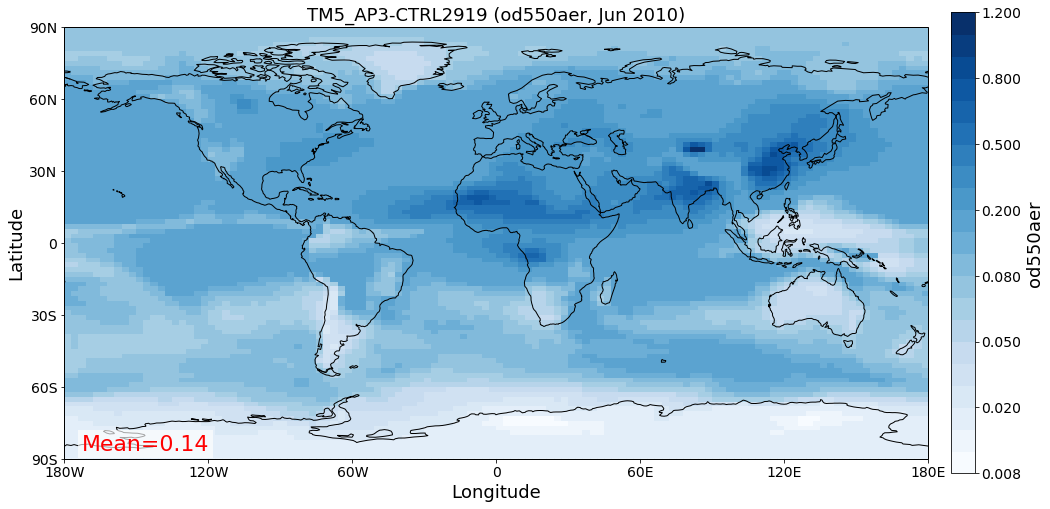

In [10]:
model_data.quickplot_map('June 2010');

#### Branching off: Converting `GriddedData` to `iris.Cube` or `xarray.DataArray`

**Actually**, the `GriddedData` object is based on the `iris.Cube` object which can be accessed via the `cube` attr:

In [11]:
cube = model_data.cube

In [12]:
type(cube)

iris.cube.Cube

In [13]:
cube

<iris 'Cube' of atmosphere_optical_thickness_due_to_ambient_aerosol / (1) (time: 12; latitude: 90; longitude: 120)>

In [14]:
try: # pyaerocom >= 0.8.1
    data_arr = model_data.to_xarray()
except: # pyaerocom < 0.8.1
    print('Coming soon in pyaerocom v0.8.1')
    import xarray as xarr
    data_arr = xarr.DataArray.from_iris(model_data.cube)
data_arr

<xarray.DataArray 'od550aer' (time: 12, lat: 90, lon: 120)>
dask.array<shape=(12, 90, 120), dtype=float32, chunksize=(12, 90, 61)>
Coordinates:
  * time     (time) object 2010-01-15 12:00:00 ... 2010-12-15 12:00:00
  * lat      (lat) float64 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float64 -181.5 -178.5 -175.5 -172.5 ... 169.5 172.5 175.5
Attributes:
    standard_name:     atmosphere_optical_thickness_due_to_ambient_aerosol
    long_name:         Ambient Aerosol Optical Thickness at 550 nm
    institution:       Royal Netherlands Meteorological Institute, De Bilt, T...
    institute_id:      KNMI
    source:            TM5-mp, r1058: CTM ERA-Interim 3x2 34L
    model_id:          TM5
    references:        Van Noije, T.P.C., et al. (Geosci. Model Dev., 7, 2435...
    experiment_id:     AP3-CTRL2019
    project_id:        AeroCom Phase 3
    title:             TM5 model output prepared for AeroCom Phase 3
    Conventions:       CF-1.6
    contact:        

#### Other methods of the `GriddedData` object that may be useful

- model_data.interpolate
- model_data.regrid
- model_data.crop
- model_data.resample_time
- model_data.sel

#### Extract data at a certain coordinate and plot timeseries

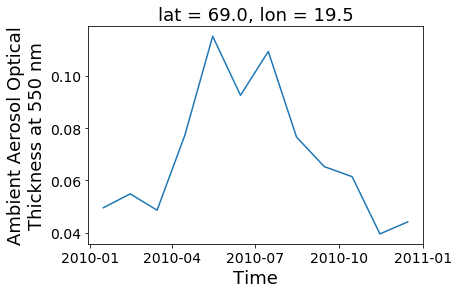

In [15]:
LON_ABISKO = 18.8312 #° E
LAT_ABISKO = 68.3495 #° N 
subset_abisko = model_data.sel(longitude=LON_ABISKO, latitude=LAT_ABISKO)
try: # pyaerocom >= 0.8.1
    subset_abisko.to_xarray().plot();
except: # pyaerocom < 0.8.1
    print('Coming soon in pyaerocom v0.8.1')
    import xarray as xarr
    data_arr = xarr.DataArray.from_iris(subset_abisko.cube).plot()

### Reading of ungridded data (`ReadUngridded` class)

- Ungridded data usually comprises timeseries data from different locations on earth and sampled at different times. 
- The data is often provided *per station* in form of text files (e.g. CSV).

![ungridded_api](pyaerocom_ungridded_io_flowchart.png)

#### Read Aeronet Sun version 3 level 2 data

In [16]:
pya.browse_database('Aeronet*V3*Lev2*')


Dataset name: AeronetSunV3Lev2.daily
Data directory: /home/jonasg/MyPyaerocom/pyaerocom-testdata/obsdata/AeronetSunV3Lev2.0.daily/renamed
Supported variables: ['od340aer', 'od440aer', 'od500aer', 'od870aer', 'ang4487aer', 'ang4487aer_calc', 'od550aer']
Last revision: 20190920
Reading failed for AeronetSunV3Lev2.AP. Error: OSError('Data directory /home/jonasg/MyPyaerocom/pyaerocom-testdata/obsdata/AeronetSunV3Lev2.0.AP/renamed of observation network AeronetSunV3Lev2.AP does not exists')
Reading failed for AeronetSDAV3Lev2.daily. Error: OSError('Data directory /home/jonasg/MyPyaerocom/pyaerocom-testdata/obsdata/Aeronet.SDA.V3L2.0.daily/renamed of observation network AeronetSDAV3Lev2.daily does not exists')
Reading failed for AeronetSDAV3Lev2.AP. Error: NetworkNotImplemented('No reading class available yet for dataset AeronetSDAV3Lev2.AP')
Reading failed for AeronetInvV3Lev2.daily. Error: OSError('Data directory /home/jonasg/MyPyaerocom/pyaerocom-testdata/obsdata/Aeronet.Inv.V3L2.0.daily

In [17]:
OBS_ID = 'AeronetSunV3Lev2.daily'

In [18]:
obs_reader = pya.io.ReadUngridded(OBS_ID)
print(obs_reader)


Dataset name: AeronetSunV3Lev2.daily
Data directory: /home/jonasg/MyPyaerocom/pyaerocom-testdata/obsdata/AeronetSunV3Lev2.0.daily/renamed
Supported variables: ['od340aer', 'od440aer', 'od500aer', 'od870aer', 'ang4487aer', 'ang4487aer_calc', 'od550aer']
Last revision: 20190920


##### Read in all stations (files) that have AOD data

In [19]:
obs_data = obs_reader.read(vars_to_retrieve='od550aer')
obs_data

UngriddedData <networks: ['AeronetSunV3Lev2.daily']; vars: ['od550aer']; instruments: ['sun_photometer'];No. of stations: 1230

### The `UngriddedData` object

#### Getting an overview

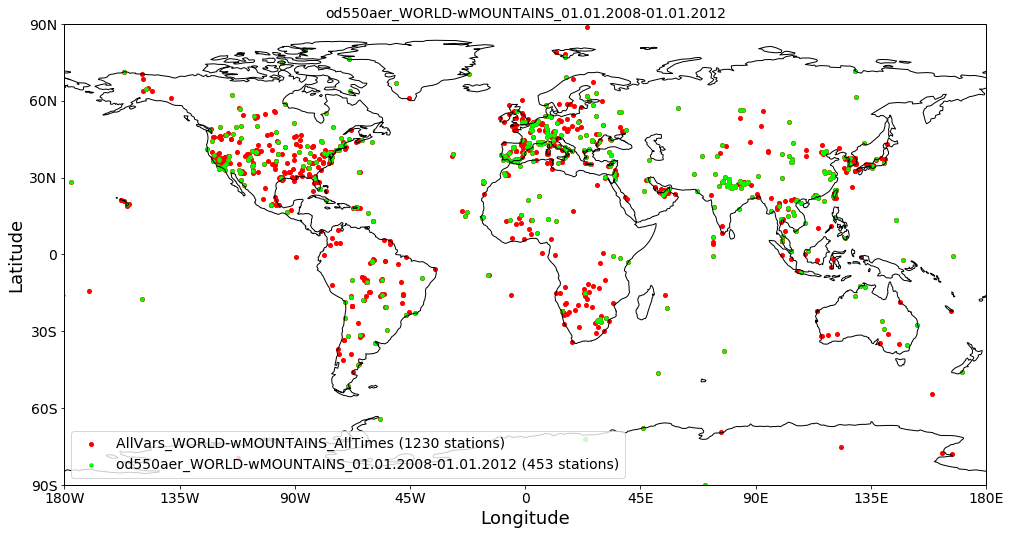

In [20]:
ax = obs_data.plot_station_coordinates(markersize=16)
ax = obs_data.plot_station_coordinates(var_name='od550aer', 
                                       start=2008, stop=2012, 
                                       markersize=12, color='lime', ax=ax)

#### Metadata -> available per file that was read in

In [21]:
len(obs_data.metadata)

1230

e.g. metadata of first file:

In [22]:
obs_data.metadata[0]

OrderedDict([('var_info',
              OrderedDict([('od550aer', OrderedDict([('units', '1')]))])),
             ('latitude', 45.3139),
             ('longitude', 12.508299999999998),
             ('altitude', 10.0),
             ('station_name', 'AAOT'),
             ('PI', 'Brent_Holben'),
             ('ts_type', 'daily'),
             ('data_id', 'AeronetSunV3Lev2.daily'),
             ('variables', ['od550aer']),
             ('instrument_name', 'sun_photometer'),
             ('data_revision', '20190920')])

#### Filter data

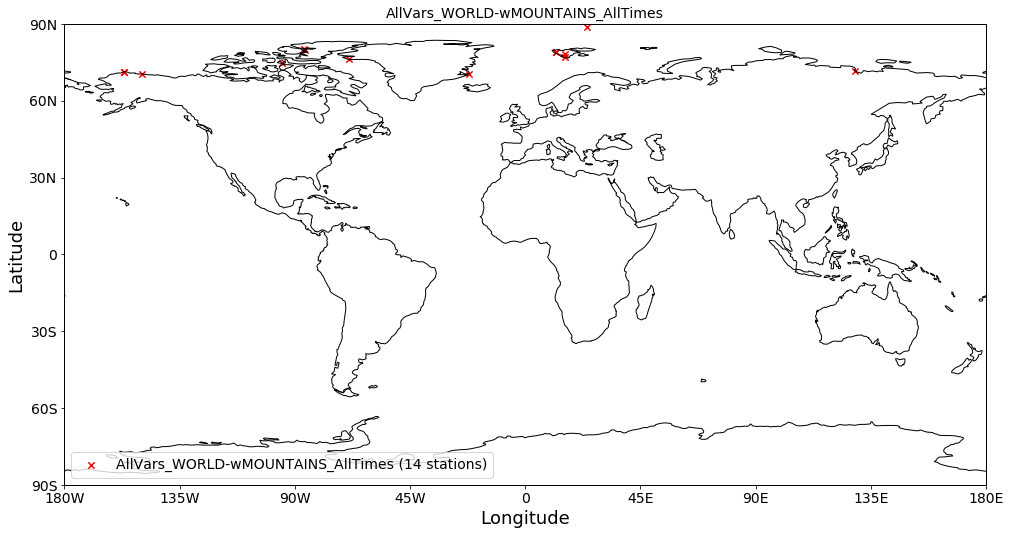

In [23]:
obs_arctic = obs_data.apply_filters(latitude=[70, 90])
obs_arctic.plot_station_coordinates(markersize=40, marker='x', color='r');

#### Extract data from individual stations (e.g. Lille)

In [24]:
lille_data = obs_data.to_station_data('*Lille*')
type(lille_data)

pyaerocom.stationdata.StationData

### Quick intro into `StationData`

- Essentially an extended python dictionary with some extras (e.g. you can use `.` and `[]` to access and assign attributes)
- contains timeseries data as `pandas.Series` 
- contains metadata

In [25]:
lille_data.keys()

odict_keys(['dtime', 'var_info', 'station_coords', 'data_err', 'overlap', 'data_flagged', 'filename', 'station_id', 'station_name', 'instrument_name', 'PI', 'country', 'ts_type', 'latitude', 'longitude', 'altitude', 'data_id', 'dataset_name', 'data_product', 'data_version', 'data_level', 'revision_date', 'website', 'ts_type_src', 'stat_merge_pref_attr', 'data_revision', 'od550aer'])

In [26]:
lille_data.longitude

3.1416669999999987

In [27]:
lille_data.latitude

50.611667000000004

##### The actual timeseries data can be accessed as `pandas.Series` simply by using the variable name

In [28]:
lille_data.od550aer # THIS is exactly equivalent to the command lille_data['od550aer']

1995-06-30 12:00:00    0.403992
1995-07-01 12:00:00    0.695444
1995-07-04 12:00:00    0.213412
1995-07-07 12:00:00    0.757272
1995-07-08 12:00:00    1.072732
                         ...   
2019-06-16 12:00:00    0.061789
2019-06-17 12:00:00    0.100830
2019-06-18 12:00:00    0.130222
2019-06-20 12:00:00    0.046714
2019-06-21 12:00:00    0.074854
Length: 3399, dtype: float64

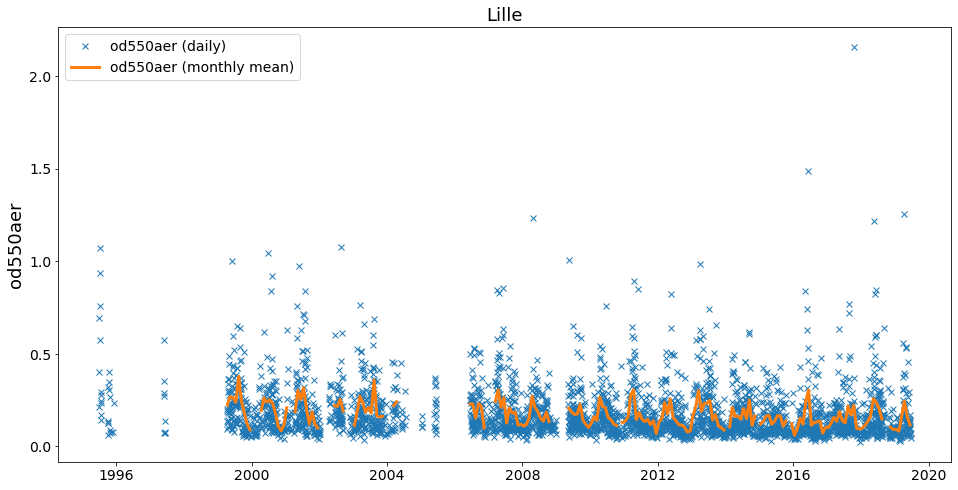

In [29]:
ax = lille_data.plot_timeseries(var_name='od550aer', marker='x', linestyle='none')
ax = lille_data.plot_timeseries(var_name='od550aer', ts_type='monthly', linestyle='-', lw=3, ax=ax)

### Colocation of model and obsdata

In [30]:
col_data = pya.colocation.colocate_gridded_ungridded(model_data, 
                                                     obs_data, 
                                                     ts_type='monthly',
                                                     start=2010)
col_data

<xarray.DataArray 'od550aer' (data_source: 2, time: 12, station_name: 290)>
array([[[     nan, 0.117588, ...,      nan, 0.222138],
        [     nan, 0.132128, ...,      nan, 0.429762],
        ...,
        [0.132236, 0.195057, ...,      nan, 0.261765],
        [     nan,      nan, ...,      nan, 0.37905 ]],

       [[0.149478, 0.146562, ..., 0.037668, 0.230157],
        [0.145884, 0.286354, ..., 0.06611 , 0.464022],
        ...,
        [0.164331, 0.199312, ..., 0.035466, 0.405731],
        [0.104762, 0.138498, ..., 0.040375, 0.455539]]])
Coordinates:
  * data_source   (data_source) <U22 'AeronetSunV3Lev2.daily' 'TM5_AP3-CTRL2919'
    var_name      (data_source) <U8 'od550aer' 'od550aer'
    var_units     (data_source) <U1 '1' '1'
    ts_type_src   (data_source) <U7 'daily' 'monthly'
  * time          (time) datetime64[ns] 2010-01-01 2010-02-01 ... 2010-12-01
  * station_name  (station_name) <U19 'ARM_Darwin' ... 'Zinder_Airport'
    latitude      (station_name) float64 -12.43 37.97 1

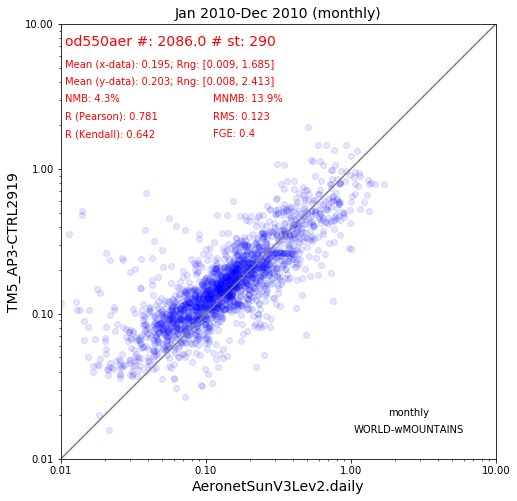

In [31]:
col_data.plot_scatter(marker='o', color='blue', alpha=0.1);

#### The `xarray.DataArray` object can be simply accessed via

In [32]:
col_data.data

<xarray.DataArray 'od550aer' (data_source: 2, time: 12, station_name: 290)>
array([[[     nan, 0.117588, ...,      nan, 0.222138],
        [     nan, 0.132128, ...,      nan, 0.429762],
        ...,
        [0.132236, 0.195057, ...,      nan, 0.261765],
        [     nan,      nan, ...,      nan, 0.37905 ]],

       [[0.149478, 0.146562, ..., 0.037668, 0.230157],
        [0.145884, 0.286354, ..., 0.06611 , 0.464022],
        ...,
        [0.164331, 0.199312, ..., 0.035466, 0.405731],
        [0.104762, 0.138498, ..., 0.040375, 0.455539]]])
Coordinates:
  * data_source   (data_source) <U22 'AeronetSunV3Lev2.daily' 'TM5_AP3-CTRL2919'
    var_name      (data_source) <U8 'od550aer' 'od550aer'
    var_units     (data_source) <U1 '1' '1'
    ts_type_src   (data_source) <U7 'daily' 'monthly'
  * time          (time) datetime64[ns] 2010-01-01 2010-02-01 ... 2010-12-01
  * station_name  (station_name) <U19 'ARM_Darwin' ... 'Zinder_Airport'
    latitude      (station_name) float64 -12.43 37.97 1

#### Save `ColocatedData` object to NetCDF

In [33]:
col_data.savename_aerocom

'od550aer_REF-AeronetSunV3Lev2.daily_MOD-TM5_AP3-CTRL2919_20100101_20101231_monthly_WORLD-wMOUNTAINS'

In [34]:
col_data.to_netcdf('.')

##### ... and from there, Sara, Diego, Anne et al. have provided you with the perfect introduction.

### High level colocation and creation of colocated NetCDF files 

The example above did essentially the following steps:

- Find a model and variable of interest
- Find a corresponding observation network that measures that variable
- Load both model and obsdata for this variable into `GriddedData` and `UngriddedData`, respectively
- Colocate the model to the observation locations and create `ColocatedData` object
- Save the colocated data object as NetCDF file

**All these steps can be done with a one-liner in pyaerocom using the `Colocator` class**

Colocate the same model and observation network but now use the Angstrom exponent (ang4487aer) instead of the AOD:

In [35]:
colocator = pya.Colocator(model_id=DATA_ID,
                          obs_id=OBS_ID,
                          obs_vars='ang4487aer', 
                          ts_type='monthly',
                          start=2010, 
                          basedir_coldata='.',
                          reanalyse_existing=True,
                          save_coldata=True)
colocator.run()

The `Colocator` objects stores all `ColocatedData` objects that were created in it's `data` attribute, which is a nested dictionary, organised via `model_id` and `var_name`:

In [36]:
colocator.data

{'TM5_AP3-CTRL2919': {'ang4487aer': <xarray.DataArray 'ang4487aer' (data_source: 2, time: 12, station_name: 264)>
  array([[[     nan, 1.128966, ...,      nan, 0.259995],
          [     nan, 0.890816, ...,      nan, 0.305093],
          ...,
          [1.346214, 0.934353, ...,      nan, 0.494529],
          [     nan,      nan, ...,      nan, 0.489275]],
  
         [[0.867116, 0.737737, ..., 1.355472, 0.622317],
          [0.9829  , 0.305702, ..., 1.235905, 0.443166],
          ...,
          [1.284731, 0.657773, ..., 1.386418, 0.62829 ],
          [1.142794, 0.750162, ..., 1.374116, 0.413073]]])
  Coordinates:
    * data_source   (data_source) <U22 'AeronetSunV3Lev2.daily' 'TM5_AP3-CTRL2919'
      var_name      (data_source) <U10 'ang4487aer' 'ang4487aer'
      var_units     (data_source) <U1 '1' '1'
      ts_type_src   (data_source) <U7 'daily' 'monthly'
    * time          (time) datetime64[ns] 2010-01-01 2010-02-01 ... 2010-12-01
    * station_name  (station_name) <U19 'ARM_Darwi

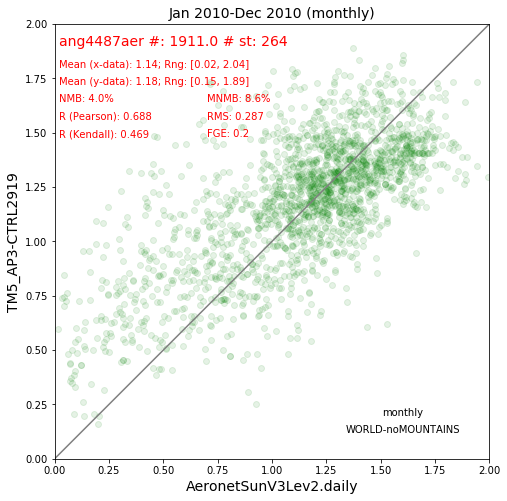

In [37]:
colocator.data[DATA_ID]['ang4487aer'].plot_scatter(marker='o', alpha=0.1, color='g');

##### Do the same for another model (e.g. CAM5.3-Oslo)

In [38]:
pya.browse_database('*CAM*')


Pyaerocom ReadGridded
---------------------
Data ID: CAM53-Oslo_7310_MG15CLM45_5feb2017IHK_53OSLO_PD_UNTUNED
Data directory: /home/jonasg/MyPyaerocom/pyaerocom-testdata/modeldata/CAM53-Oslo_7310_MG15CLM45_5feb2017IHK_53OSLO_PD_UNTUNED/renamed
Available experiments: ['UNTUNED']
Available years: [2008, 2009, 2010]
Available frequencies ['monthly']
Available variables: ['abs550aer', 'abs550aercs', 'ang4487aer', 'ang4487csaer', 'od550aer', 'od550csaer', 'od550lt1aer']


In [39]:
ANOTHER_MODEL_ID = 'CAM53-Oslo_7310_MG15CLM45_5feb2017IHK_53OSLO_PD_UNTUNED'

In [40]:
colocator.run(model_id=ANOTHER_MODEL_ID)
colocator.data.keys()

dict_keys(['TM5_AP3-CTRL2919', 'CAM53-Oslo_7310_MG15CLM45_5feb2017IHK_53OSLO_PD_UNTUNED'])

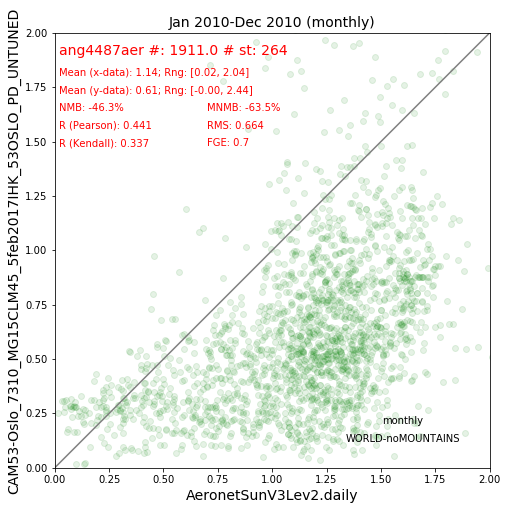

In [41]:
colocator.data[ANOTHER_MODEL_ID]['ang4487aer'].plot_scatter(marker='o', alpha=0.1, color='g');

#### Usage example: Compute AOD bias and plot bias map

In [42]:
_arr = col_data.data
mean_bias = ((_arr[1] - _arr[0])/_arr[0]).mean('time') * 100 #%
mean_bias

<xarray.DataArray 'od550aer' (station_name: 290)>
array([ 32.791464,  44.197759, -23.840775, ...,  19.99503 ,  36.219445,
        14.187602])
Coordinates:
    var_name      <U8 'od550aer'
    var_units     <U1 '1'
  * station_name  (station_name) <U19 'ARM_Darwin' ... 'Zinder_Airport'
    latitude      (station_name) float64 -12.43 37.97 15.35 ... 62.45 13.78
    longitude     (station_name) float64 130.9 23.72 -1.479 ... -114.4 8.99
    altitude      (station_name) float64 29.9 130.0 305.0 ... 300.0 220.8 456.0
    data_source   <U22 'AeronetSunV3Lev2.daily'
    ts_type_src   <U7 'daily'

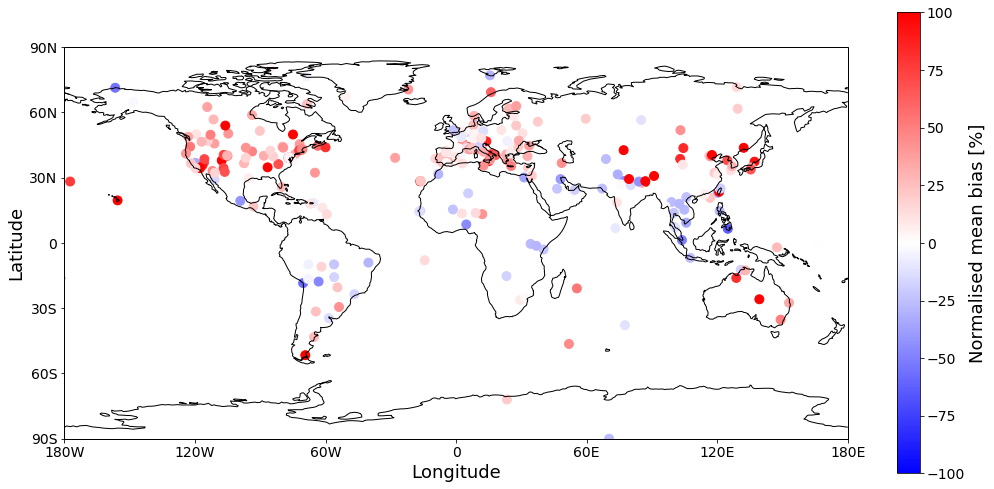

In [43]:
ax = pya.plot.mapping.init_map()
_sc = ax.scatter(mean_bias.longitude, mean_bias.latitude, marker='o', c=mean_bias.data, cmap='bwr', 
                 vmin=-100, vmax=100, s=80)
cb = plt.colorbar(_sc)
cb.ax.set_ylabel('Normalised mean bias [%]');

### Now if you colocate a lot of models against multiple different observations, you might end up here:

https://aerocom-evaluation.met.no/overall.php?project=aerocom&exp=PIII-optics2019